# Разработка A/B-тестирования и анализ результатов

Вы работаете продуктовым аналитиком в компании, которая разрабатывает развлекательное приложение с функцией «бесконечной» ленты, как, например, в приложениях с короткими видео. В вашем приложении существует две модели монетизации: первая — ежемесячная платная подписка, которая позволяет пользователям смотреть ленту без рекламы, вторая — демонстрация рекламы для пользователей, которые ещё не оформили подписку.

Команда разработчиков рекомендательных систем создала новый алгоритм рекомендаций, который, по их мнению, будет показывать более интересный контент для каждого пользователя. Вас, как аналитика, просят помочь рассчитать параметры A/B-теста, который позволит проверить эту гипотезу, и проанализировать его результаты.

# Разоработка А/В-тестирования и анализ результатов. 


- Автор:Калачёва Анастасия
- Дата: 05.04.2025 г.


#### *Цели и задачи проекта*
**Цель:** Провести и разработать А/В-тест для развлекательного приложения и проанализировать результаты.

  **Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Подготовка к проведению теста:
    - расчёт размера выборки;
    - расчёт длительности A/B-теста.
3. Мониторинг проведения А/В-теста:
    - проверка распределения пользователей по группам;
    - проверка пересечений пользователей;
    - проверка распределения пользователей по категориальным переменным;
    - вывод после проверки A/B-теста.
4. Проверка результатов A/B-теста.
5. Сформулировать вывод по результатам A/B-эксперимента.

### 1. Работа с историческими данными (EDA)

#### 1.1. Загрузка исторических данных
На первом этапе поработайте с историческими данными приложения:

- Импортируйте библиотеку pandas.

- Считайте и сохраните в датафрейм `sessions_history` CSV-файл с историческими данными о сессиях пользователей `sessions_project_history.csv`.

Выведите на экран первые пять строк полученного датафрейма.

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 # Сохраняем данные в датафрейм sessions_history
sessions_history=pd.read_csv('/datasets/sessions_project_history.csv')

In [3]:
# Выводим 5 иервые пять строк датафрейма
sessions_history.head()

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android


#### 1.2. Знакомство с данными
- Для каждого уникального пользователя `user_id` рассчитайте количество уникальных сессий `session_id`.

- Выведите на экран все данные из таблицы `sessions_history` для одного пользователя с наибольшим количеством сессий. Если таких пользователей несколько, выберите любого из них.

- Изучите таблицу для одного пользователя, чтобы лучше понять логику формирования каждого столбца данных.



In [4]:
# Создадим копию датафрейма sessions_history для расчета уникальных сессий для каждого user_id
df_s_h=sessions_history.copy()

In [5]:
# Добавляем колонку с количеством уникальных сессий для каждого пользователя
df_s_h['unique_sessions'] = (
    df_s_h
    .groupby('user_id')['session_id']
    .transform('nunique')  # Применяем nununique к группе и сохраняем исходные индексы
)

# Сортируем данные по убыванию unique_sessions
sessions_history_sorted = df_s_h.sort_values('unique_sessions', ascending=False)

# Получаем данные для пользователя с наибольшим количеством сессий
max_user_sessions = sessions_history_sorted.iloc[0]

# Получаем user_id пользователя с наибольшим количеством сессий
max_user_id = max_user_sessions['user_id']

# Выводим данные на экран для этого пользователя
display(df_s_h.query('user_id == @max_user_id')[[
    'user_id', 'session_id', 'session_date', 'session_start_ts', 'install_date','session_number','registration_flag',
    'page_counter','region','device'
]])

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
124515,6A73CB5566BB494D,110E3F28C1F5415F,2025-08-28,2025-08-28 18:58:19,2025-08-28,1,0,3,MENA,Mac
196252,6A73CB5566BB494D,D68C8D98A0F1C439,2025-08-29,2025-08-29 20:53:27,2025-08-28,2,1,3,MENA,Mac
242428,6A73CB5566BB494D,6587D217472BF807,2025-08-30,2025-08-30 13:08:22,2025-08-28,3,1,1,MENA,Mac
304287,6A73CB5566BB494D,A9BC25593D056F8E,2025-09-01,2025-09-01 18:52:49,2025-08-28,4,1,2,MENA,Mac
346611,6A73CB5566BB494D,CB6F9C4191FAF6F6,2025-09-03,2025-09-03 22:49:08,2025-08-28,5,1,3,MENA,Mac
363510,6A73CB5566BB494D,9C609432F6E6535A,2025-09-04,2025-09-04 13:59:46,2025-08-28,6,1,4,MENA,Mac
391902,6A73CB5566BB494D,5D892E33B97A257A,2025-09-06,2025-09-06 18:46:55,2025-08-28,7,1,2,MENA,Mac
404322,6A73CB5566BB494D,22A9BD3861F49087,2025-09-07,2025-09-07 18:33:49,2025-08-28,8,1,3,MENA,Mac
415489,6A73CB5566BB494D,F70E351154B092DC,2025-09-08,2025-09-08 20:30:22,2025-08-28,9,1,4,MENA,Mac
425805,6A73CB5566BB494D,84A3DC0CFF449F53,2025-09-09,2025-09-09 16:36:04,2025-08-28,10,1,1,MENA,Mac


#### 1.3. Анализ числа регистраций
Одна из важнейших метрик продукта — число зарегистрированных пользователей. Используя исторические данные, визуализируйте, как менялось число регистраций в приложении за время его существования.

- Агрегируйте исторические данные и рассчитайте число уникальных пользователей и число зарегистрированных пользователей для каждого дня наблюдения. Для простоты считайте, что у пользователя в течение дня бывает одна сессия максимум и статус регистрации в течение одного дня не может измениться.

- Постройте линейные графики общего числа пользователей и общего числа зарегистрированных пользователей по дням. Отобразите их на одном графике.

- Постройте отдельный линейный график доли зарегистрированных пользователей от всех пользователей по дням.

- На обоих графиках должны быть заголовок, подписанные оси X и Y, сетка и легенда.

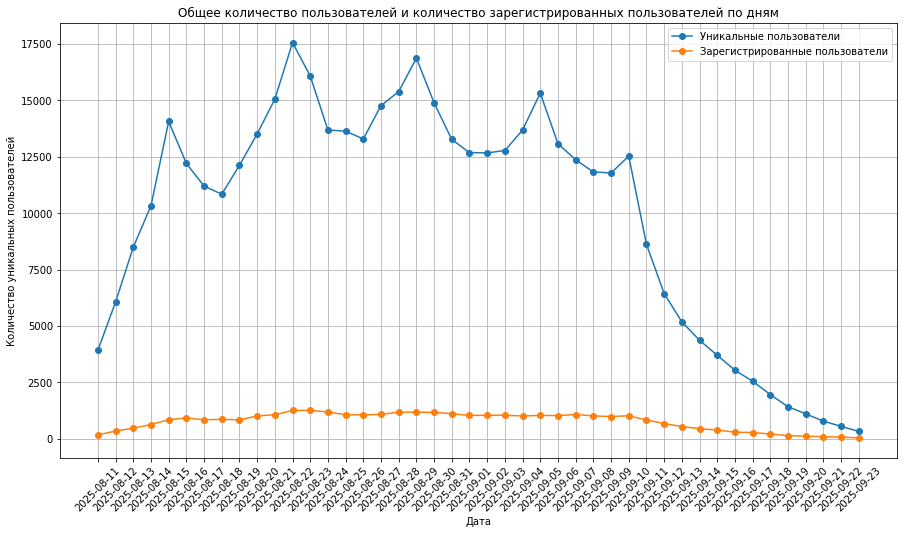

In [6]:
# Получение уникальных пользователей и зарегистрированных пользователей
df_users=(sessions_history.groupby(['session_date','registration_flag']).agg({'user_id':'nunique'}))
users_uniq = df_users.groupby('session_date').user_id.sum()
users_uniq_fl = df_users.query('registration_flag == 1').groupby('session_date').user_id.sum()

# Построение графика
plt.figure(figsize=(15, 8))
plt.plot(users_uniq.index, users_uniq.values, label='Уникальные пользователи', marker='o')
plt.plot(users_uniq_fl.index, users_uniq_fl.values, label='Зарегистрированные пользователи', marker='o')

plt.xlabel("Дата")
plt.ylabel("Количество уникальных пользователей")
plt.legend()
plt.title('Общее количество пользователей и количество зарегистрированных пользователей по дням')
plt.xticks(rotation=45)  # Поворот меток по оси X для лучшей читаемости
plt.grid()
plt.show()

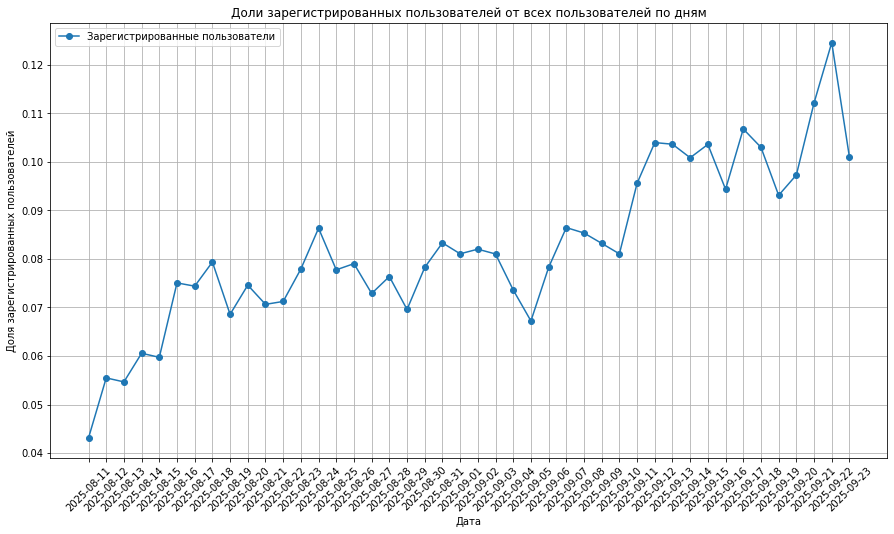

In [7]:
# Вычисляем долю зарегистрированных уникальных пользователей от общего числа по дням
users_uniq_fl_share=users_uniq_fl/users_uniq
# Построение графика
plt.figure(figsize=(15, 8))
plt.plot(users_uniq_fl_share.index, users_uniq_fl_share.values, label='Зарегистрированные пользователи', marker='o')

plt.xlabel("Дата")
plt.ylabel("Доля зарегистрированных пользователей")
plt.legend()
plt.title('Доли зарегистрированных пользователей от всех пользователей по дням')
plt.xticks(rotation=45)  # Поворот меток по оси X для лучшей читаемости
plt.grid()
plt.show()


#### 1.4. Анализ числа просмотренных страниц
Другая важная метрика продукта — число просмотренных страниц в приложении. Чем больше страниц просмотрено, тем сильнее пользователь увлечён контентом, а значит, выше шансы на то, что он зарегистрируется и оплатит подписку.

- Найдите количество сессий для каждого значения количества просмотренных страниц. Например: одну страницу просмотрели в 29160 сессиях, две страницы в 105536 сессиях и так далее.

- Постройте столбчатую диаграмму, где по оси X будет число просмотренных страниц, по оси Y — количество сессий.

- На диаграмме должны быть заголовок, подписанные оси X и Y.

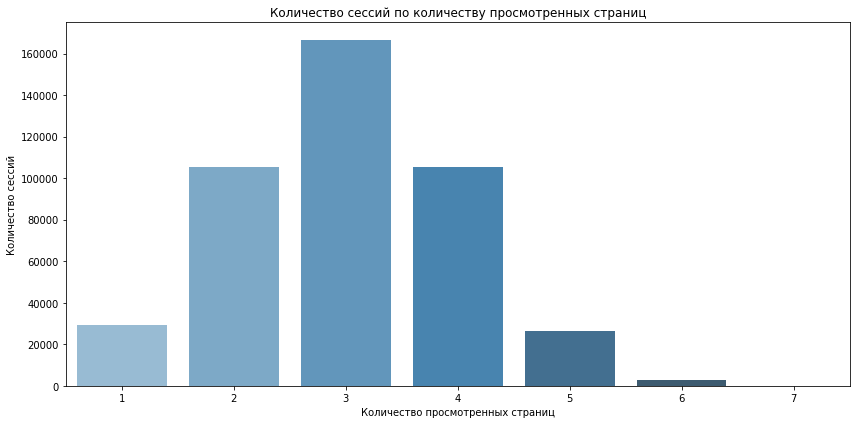

In [8]:
# Группируем данные по количеству просмотренных страниц и считаем количество сессий
df_page_sessions = sessions_history.groupby('page_counter')['session_id'].agg(count_session='count').reset_index().sort_values(by='page_counter')

# Создание столбчатой диаграммы
plt.figure(figsize=(12, 6))  # Устанавливаем размер графика
sns.barplot(x='page_counter', y='count_session', data=df_page_sessions, palette='Blues_d')
    
# Добавляем заголовок и метки осей
plt.title('Количество сессий по количеству просмотренных страниц')
plt.xlabel('Количество просмотренных страниц')
plt.ylabel('Количество сессий')

# Отображаем график
plt.tight_layout()  # Автоматическая подстройка элементов графика
plt.show()

#### 1.5. Доля пользователей, просмотревших более четырёх страниц
Продуктовая команда продукта считает, что сессии, в рамках которых пользователь просмотрел 4 и более страниц, говорят об удовлетворённости контентом и алгоритмами рекомендаций. Этот показатель является важной прокси-метрикой для продукта.

- В датафрейме `sessions_history` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если было просмотрено меньше.

- Постройте график со средним значением доли успешных сессий ко всем сессиям по дням за весь период наблюдения.

In [9]:
#Создадим функцию которая проверит количество просмотренных страниц 
def page_count (row):
    sgn = row['page_counter']
    if sgn >=4:
        return 1
    else:
        return 0
# Применяем функцию 
sessions_history['good_session'] = sessions_history.apply(page_count, axis=1)

# Проверяем результат, выведем уникальные значения в столбце
print(sessions_history['good_session'].unique())

[0 1]


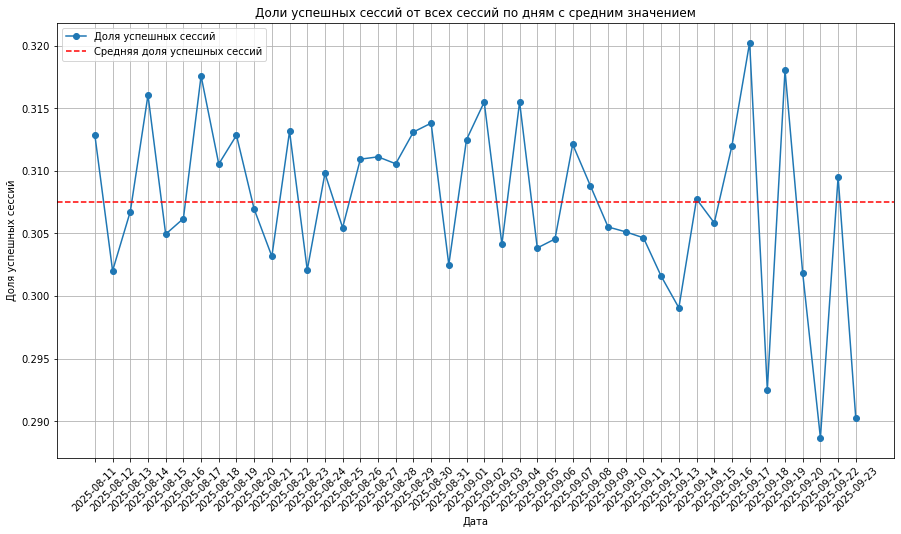

In [10]:
# Считаем общее количество уникальных сессий по дате
session_uniq = sessions_history.groupby('session_date')['session_id'].nunique() 

# Считаем количество успешных сессий по дате
session_good = sessions_history.query('good_session == 1').groupby('session_date')['session_id'].nunique() 

# Вычисляем долю успешных сессий от общего числа по дням
session_good_share = session_good / session_uniq

# Вычисляем среднее значение доли успешных сессий
mean_good_share = session_good_share.mean()

# Построение графика
plt.figure(figsize=(15, 8))
plt.plot(session_good_share.index, session_good_share.values, label='Доля успешных сессий', marker='o')
plt.axhline(y=mean_good_share, color='r', linestyle='--', label='Средняя доля успешных сессий')

plt.xlabel("Дата")
plt.ylabel("Доля успешных сессий")
plt.legend()
plt.title('Доли успешных сессий от всех сессий по дням с средним значением')
plt.xticks(rotation=45)  # Поворот меток по оси X для лучшей читаемости
plt.grid()
plt.show()

### 2. Подготовка к тесту
При планировании теста необходимо проделать несколько важных шагов:

- Определиться с целевой метрикой.

- Рассчитать необходимый размер выборки.

- Исходя из текущих значений трафика, рассчитать необходимую длительность проведения теста.

#### 2.1. Расчёт размера выборки
В рамках курса вам уже приходилось рассчитывать размеры выборки, используя онлайн-калькуляторы. В этом задании предлагаем воспользоваться готовым кодом и рассчитать необходимое для вашего дизайна эксперимента количество пользователей.

Для этого установите в коде ниже следующие параметры:

- Уровень значимости — 0.05.

- Вероятность ошибки второго рода — 0.2.

- Мощность теста.

- Минимальный детектируемый эффект, или MDE, — 3%. Обратите внимание, что здесь нужно указать десятичную дробь, а не процент.

При расчёте размера выборки мы будем использовать метод `solve_power()` из класса `power.NormalIndPower` модуля `statsmodels.stats`.

Запустите ячейку и изучите полученное значение.

In [11]:
from statsmodels.stats.power import NormalIndPower

# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 0.8  # Мощность теста
mde = 0.03  # Минимальный детектируемый эффект

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = mde,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 17441


#### 2.1. Расчёт длительности A/B-теста

Используйте данные о количестве пользователей в каждой выборке и среднем количестве пользователей приложения. Рассчитайте длительность теста, разделив одно на другое.

- Рассчитайте среднее количество уникальных пользователей приложения в день.

- Определите длительность теста, исходя из рассчитанного значения размера выборок и среднего дневного трафика приложения. Количество дней округлите в большую сторону.

In [12]:
from math import ceil

# Среднее количество пользователей приложения в день по историческим данным
avg_daily_users =sessions_history.groupby('session_date')['user_id'].nunique().mean()

# Рассчитываем длительность теста в днях как отношение размера выборки к среднему числу пользователей
test_duration = ceil((sample_size*2)/avg_daily_users)

print(f"Рассчитанная длительность A/B-теста при текущем уровене трафика в {round(avg_daily_users,3)} пользователей в день составит {test_duration} дней")

Рассчитанная длительность A/B-теста при текущем уровене трафика в 9907.364 пользователей в день составит 4 дней


### 3. Мониторинг А/В-теста

#### 3.1. Проверка распределения пользователей

A/B-тест успешно запущен, и уже доступны данные за первые три дня. На этом этапе нужно убедиться, что всё идёт хорошо: пользователи разделены правильным образом, а интересующие вас метрики корректно считаются.

- Считайте и сохраните в датафрейм `sessions_test_part` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test_part.csv`.

- Рассчитайте количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения.

- Рассчитайте и выведите на экран процентную разницу в количестве пользователей в группах A и B. Постройте любую удобную визуализацию, на которой можно было бы увидеть возможное различие двух групп.

Для расчёта процентной разницы воспользуйтесь формулой:
$$P = 100 \cdot  \frac{|A − B|}{A}$$

In [13]:
# Сохраняем данные в датафрейм sessions_test_part
sessions_test_part=pd.read_csv('/datasets/sessions_project_test_part.csv')

In [14]:
# Рассчитываем количество уникальных пользователей в экспериментальной группе А
test_part_A=sessions_test_part[sessions_test_part['test_group'] == 'A']['user_id'].nunique()

# Выводим количество пользователей группы А
print(f'Количество уникальных пользователей в группе А = {test_part_A}')

# Рассчитываем количество уникальных пользователей в экспериментальной группе А
test_part_B=sessions_test_part[sessions_test_part['test_group'] == 'B']['user_id'].nunique()

# Выводим количество пользователей группы В
print(f'Количество уникальных пользователей в группе В = {test_part_B}')

# Рассчитываем процентную разницу в количестве пользователей в группах
𝑃=100*((test_part_A-test_part_B)/test_part_A)

# Выводим процентную разницу
print(f'Процентная разница в группах = {𝑃}')

Количество уникальных пользователей в группе А = 1477
Количество уникальных пользователей в группе В = 1466
Процентная разница в группах = 0.7447528774542992


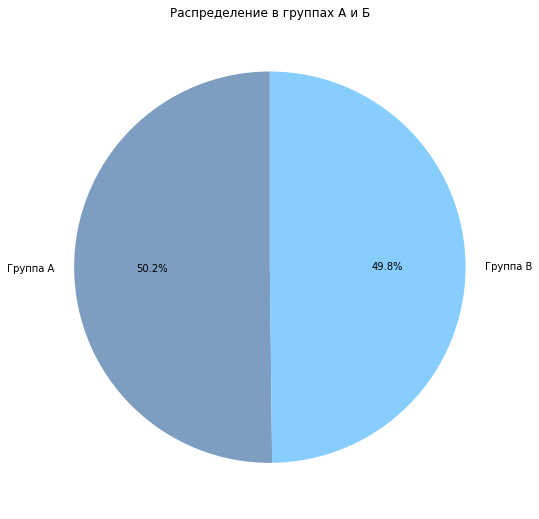

In [15]:
# Создадим словарь для замены названий
group_names = {
    'A': 'Группа А',
    'B': 'Группа В',  
}
#Группируем данные по группам и считаем уникальные user_id
sessions_test_part_1=sessions_test_part.groupby(['test_group'])['user_id'].nunique()

# Переименуем индекс, используя словарь
sessions_test_part_1 = sessions_test_part_1.rename(index=group_names)

# Строим груговую диаграмму
sessions_test_part_1.plot.pie(
    autopct='%1.1f%%', # Формат отображения процента
    startangle=90,# Начальный угол
    colors=['#7D9EC0', '#87CEFF'],# Выбор цветовой гаммы
    figsize=(9,9),     # Размер графика
   )
# Настраиваем оформление графика
plt.title('Распределение в группах А и Б')  # Заголовок графика
plt.ylabel('')  # Отключаем подпись для оси Y
plt.grid(False)  # Выключаем сетку для круговой диаграммы
# Выводим график
plt.show()


#### 3.2. Проверка пересечений пользователей
Помимо проверки равенства количества пользователей в группах полезно убедиться в том, что группы независимы. Для этого нужно убедиться, что никто из пользователей случайно не попал в обе группы одновременно.

- Рассчитайте количество пользователей, которые встречаются одновременно в группах A и B, или убедитесь, что таких нет.

In [16]:
# Сохраняем в переменную group_А данные пользователей 
group_А=sessions_test_part[sessions_test_part['test_group'] == 'A']['user_id']

# Сохраняем в переменную group_B данные пользователей 
group_B=sessions_test_part[sessions_test_part['test_group'] == 'B']['user_id']

# Проверяем пересечение пользователей в группах
intersection = list(set(group_B) & set(group_А))

# Считаем и выводим количество таких пользователей
print(f'Количество пользователей одновременно в группах A и B ={len(intersection)}')

Количество пользователей одновременно в группах A и B =0


#### 3.3. Равномерность разделения пользователей по устройствам
Полезно также убедиться в том, что пользователи равномерно распределены по всем доступным категориальным переменным — типам устройства и регионам.

Постройте две диаграммы:

- доля каждого типа устройства для пользователей из группы A,

- доля каждого типа устройства для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение устройств в группах A и B.


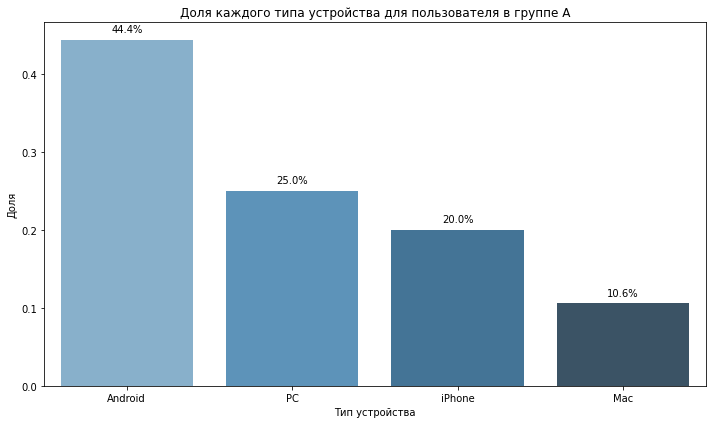

In [17]:
# Вычисляем количество уникальных пользователей для каждого типа устройства в группе А
group_А_device = sessions_test_part[sessions_test_part['test_group'] == 'A'].groupby('device')['user_id'].nunique()
# Вычисляем общее количество уникальных пользователей в группе А
total_users_A = sessions_test_part[sessions_test_part['test_group'] == 'A']['user_id'].nunique()
# Вычисляем долю уникальных пользователей для каждого типа устройства в группе А
group_А_device_percentage = group_А_device/total_users_A

# Преобразуем Series в DataFrame для seaborn
group_А_device_df =group_А_device_percentage.reset_index()
group_А_device_df.columns = ['device', 'percentage']

# Сортируем DataFrame по убыванию доли
group_А_device_df = group_А_device_df.sort_values(by='percentage', ascending=False)

# Создаем столбчатую диаграмму с помощью seaborn
plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
ax=sns.barplot(x='device', y='percentage', data=group_А_device_df, palette='Blues_d')
plt.title('Доля каждого типа устройства для пользователя в группе А')
plt.xlabel('Тип устройства')
plt.ylabel('Доля')
plt.tight_layout()  # Предотвращаем перекрывание элементов графика

# Добавляем подписи к столбцам 
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height() * 100)
    x = p.get_x() + p.get_width() / 2  # Центрируем подпись по горизонтали
    y = p.get_height() + 0.01        # Поднимаем подпись немного выше верха столбца
    ax.text(x, y, percentage, ha='center')
plt.show()

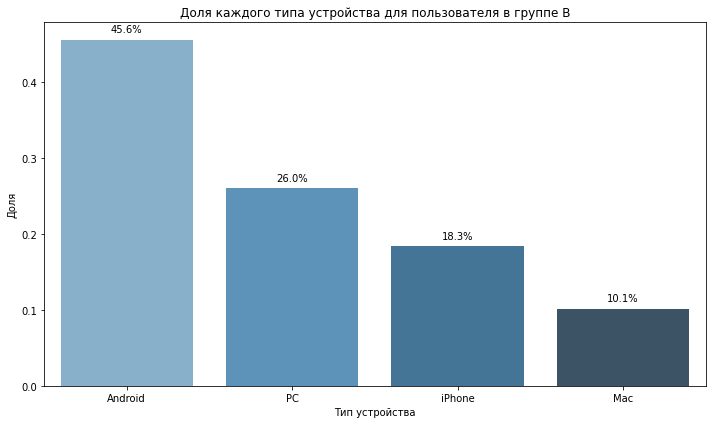

In [18]:
# Вычисляем количество уникальных пользователей для каждого типа устройства в группе В
group_B_device = sessions_test_part[sessions_test_part['test_group'] == 'B'].groupby('device')['user_id'].nunique()
# Вычисляем общее количество уникальных пользователей в группе В
total_users_B = sessions_test_part[sessions_test_part['test_group'] == 'B']['user_id'].nunique()
# Вычисляем долю уникальных пользователей для каждого типа устройства в группе В
group_B_device_percentage = group_B_device/total_users_B

# Преобразуем Series в DataFrame для seaborn
group_B_device_df =group_B_device_percentage.reset_index()
group_B_device_df.columns = ['device', 'percentage']

# Сортируем DataFrame по убыванию доли
group_B_device_df = group_B_device_df.sort_values(by='percentage', ascending=False)

# Создаем столбчатую диаграмму с помощью seaborn
plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
ax=sns.barplot(x='device', y='percentage', data=group_B_device_df, palette='Blues_d')
plt.title('Доля каждого типа устройства для пользователя в группе В')
plt.xlabel('Тип устройства')
plt.ylabel('Доля')
plt.tight_layout()  # Предотвращаем перекрывание элементов графика

# Добавляем подписи к столбцам 
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height() * 100)
    x = p.get_x() + p.get_width() / 2  # Центрируем подпись по горизонтали
    y = p.get_height() + 0.01        # Поднимаем подпись немного выше верха столбца
    ax.text(x, y, percentage, ha='center')
plt.show()

#### 3.4. Равномерность распределения пользователей по регионам
Теперь убедитесь, что пользователи равномерно распределены по регионам.

Постройте две диаграммы:

- доля каждого региона для пользователей из группы A,

- доля каждого региона для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение регионов в группах A и B. Постарайтесь использовать другой тип диаграммы, не тот, что в прошлом задании.


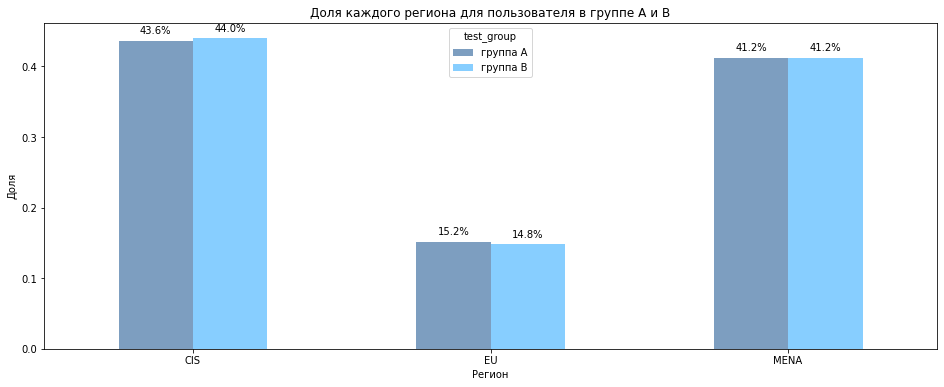

In [19]:
# Вычисляем количество уникальных пользователей для каждого региона в группе А
group_А_region = sessions_test_part[sessions_test_part['test_group'] == 'A'].groupby('region')['user_id'].nunique()
# Вычисляем общее количество уникальных пользователей в группе А
total_users_A_region = sessions_test_part[sessions_test_part['test_group'] == 'A']['user_id'].nunique()
# Вычисляем долю уникальных пользователей для каждого региона в группе А
group_А_region_percentage = group_А_region/total_users_A_region

# Преобразуем Series в DataFrame для seaborn
group_А_region_df =group_А_region_percentage.reset_index()
group_А_region_df.columns = ['region', 'percentage']

# Вычисляем количество уникальных пользователей для каждого региона в группе А
group_B_region = sessions_test_part[sessions_test_part['test_group'] == 'B'].groupby('region')['user_id'].nunique()
# Вычисляем общее количество уникальных пользователей в группе А
total_users_B_region = sessions_test_part[sessions_test_part['test_group'] == 'B']['user_id'].nunique()
# Вычисляем долю уникальных пользователей для каждого региона в группе А
group_B_region_percentage = group_B_region/total_users_B_region

# Преобразуем Series в DataFrame для seaborn
group_B_region_df =group_B_region_percentage.reset_index()
group_B_region_df.columns = ['region', 'percentage']

# Добавляем столбец с указанием группы
group_А_region_df['test_group'] = 'группа A'
group_B_region_df['test_group'] = 'группа B'

# Объединяем данные
group_region_df = pd.concat([group_А_region_df, group_B_region_df], ignore_index=True)

# Создаем сводную таблицу
pivot_region = group_region_df.pivot(
    index='region', 
    columns='test_group', 
    values='percentage'
)
# Создаем список цветовой гаммы для диаграммы
colors = ['#7D9EC0', '#87CEFF'] 
# Построим график столбчатой диаграммы
ax=pivot_region.plot(kind='bar',
               title=f'Доля каждого региона для пользователя в группе А и В',
               legend=True,
               color=colors,
               ylabel='Доля',
               xlabel='Регион',
               rot=0,
               figsize=(16, 6))
plt.grid(False) # Отключаем сетку для диаграммы

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height() * 100)
    x = p.get_x() + p.get_width() / 2  # Центрируем подпись по горизонтали
    y = p.get_height() + 0.01        # Поднимаем подпись немного выше верха столбца
    ax.text(x, y, percentage, ha='center')
# Выводим график
plt.show()

#### 3.5. Вывод после проверки A/B-теста

На основе проведённого анализа A/B-теста сформулируйте и запишите свои выводы. В выводе обязательно укажите:

- Были ли обнаружено различие в количестве пользователей в двух группах.

- Являются ли выборки независимыми. Было ли обнаружено пересечение пользователей из тестовой и контрольной групп.

- Сохраняется ли равномерное распределение пользователей тестовой и контрольной групп по категориальным переменным: устройствам и регионам.

Сделайте заключение о том, корректно ли проходит A/B-тест или наблюдаются какие-либо нарушения.


На основании проведенного анализа A/B-теста можно сделать следующие выводы:

 ###### Различие в количестве пользователей:
В процессе тестирования для `контрольной группы A` количество уникальных пользователей одного дня наблюдения равно `1477` и `тестовой группы B` равно `1466` и  процентная разница в группах составила `0.745`. Разница в численности пользователей была выявлена, но она не может повлиять на результаты теста и вероятную интерпретацию выявленных различий в поведении пользователей или метриках. 
 ###### Независимость выборок: 
В течение проведения теста осуществили проверку на наличие пользователей одновременно в обеих группах контрольной А и тестовой В. Для этого уникальных пользователей отсортировали по группам и с помощью метода `intersection` проверили на пересечение идинтификатора пользователя  в группе А и в группе В. При подсчете таких пользователей выявлено не было и сумма оказалась равна `0`. Можно сделать вывод, что выборки групп независимы и пользователи попадают только в одну из групп.

###### Распределение по категориальным переменным:
Важным аспектом является то, как равномерно распределяются пользователи по категориальным переменным- типам устройств и регионам в обеих группах. Была проведена в проверка на равномерность распределения уникальных пользователей по данным переменным. 
 - по типам устройств доля распределение пользователей  
 в группе А составило: `Android-0.444`,`Mac-0.106`,` PC-0.250`,`iPhone-0.200`  
 в группе В составило: `Android-0.440`, `Mac-0.101`, `PC-0.260`, `iPhone-0.183`  
 Можно заметить, что данные в тестовой и контрольной группах по типам устройств распределены равномерно.
 
 - по регионам доля распределение пользователей  
 в группе А составило: `CIS-0.436`,`EU-0.152`,` MENA-0.412`  
 в группе В составило: `CIS-0.440`,`EU-0.148`, `MENA-0.412`  
  Распределение доли пользователей в тестовой и контрольной группах по регионам так же распределены равномерно.  
  
 ###### Заключение о корректности A/B-теста: 
 На основании проведенного анализа можно сделать предварительное заключение о корректности прохождения A/B-теста. Это подтверждается отсутствием значимых различий в количестве пользователей между тестовой группы А и контрольной группы В, а также наблюдается независимость выборок и равномерное распределение по категориальным переменным, то есть можно считать тест корректным. 

### 4. Проверка результатов A/B-теста

A/B-тест завершён, и у вас есть результаты за все дни проведения эксперимента. Необходимо убедиться в корректности теста и верно интерпретировать результаты.

#### 4.1. Получение результатов теста и подсчёт основной метрики

- Считайте и сохраните в датафрейм `sessions_test` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test.csv`.

- В датафрейме `sessions_test` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если просмотрено меньше.

In [20]:
# Сохраняем данные в датафрейм sessions_test
sessions_test=pd.read_csv('/datasets/sessions_project_test.csv')

In [21]:
# Применяем функцию 
sessions_test['good_session'] = sessions_test.apply(page_count, axis=1)

# Проверяем результат, выведем уникальные значения в столбце
print(sessions_test['good_session'].unique())

[0 1]


#### 4.2. Проверка корректности результатов теста

Прежде чем приступать к анализу ключевых продуктовых метрик, необходимо убедиться, что тест проведён корректно и вы будете сравнивать две сопоставимые группы.

- Рассчитайте количество уникальных сессий для каждого дня и обеих тестовых групп, используя группировку.

- Проверьте, что количество уникальных дневных сессий в двух выборках не различается или различия не статистически значимы. Используйте статистический тест, который позволит сделать вывод о равенстве средних двух выборок.

- В качестве ответа выведите на экран полученное значение p-value и интерпретируйте его.

In [22]:
# Импортируем функцию ttest_ind из библиотеки scipy.stats,
from scipy.stats import ttest_ind
# Рассчитываем количество уникальных сессий для каждого дня и обеих тестовых групп,
sessions_test_count_unique=sessions_test.groupby(['session_date','test_group'])['session_id'].nunique().reset_index()

# Делим данные на группы A и B
count_unique_session_A=sessions_test_count_unique[sessions_test_count_unique['test_group'] == 'A']['session_id']
count_unique_session_B=sessions_test_count_unique[sessions_test_count_unique['test_group'] == 'B']['session_id']

# Далее, проводим t-тест
test_result_A_B=ttest_ind(
    count_unique_session_A,
    count_unique_session_B,
    alternative='two-sided'
)
# Устанавливаем Уровень значимости
alpha=0.05

if test_result_A_B.pvalue>alpha:
    print(f'pvalue={round(test_result_A_B.pvalue,2)}>{alpha}')
    print('Различия между группами А и В среднего значения уникальных дневных сессий статистически не значимы')
    
else: 
    print(f'pvalue={round(test_result_A_B.pvalue,2)}<{alpha}')
    print('Различия между группами А и В среднего значения уникальных дневных сессий статистически значимы')              

pvalue=0.94>0.05
Различия между группами А и В среднего значения уникальных дневных сессий статистически не значимы


#### 4.3. Сравнение доли успешных сессий

Когда вы убедились, что количество сессий в обеих выборках не различалось, можно переходить к анализу ключевой метрики — доли успешных сессий.

Используйте созданный на первом шаге задания столбец `good_session` и рассчитайте долю успешных сессий для выборок A и B, а также разницу в этом показателе. Полученный вывод отобразите на экране.

In [23]:
# Находим долю успешных сессий для группы А
sessions_good_A=sessions_test[sessions_test['test_group'] == 'A']['good_session'].mean()

# Находим долю успешных сессий для группы В
sessions_good_B=sessions_test[sessions_test['test_group'] == 'B']['good_session'].mean()

# Вычисляем разницу доли успешных сессий между группами
difference_A_B=100*(sessions_good_A-sessions_good_B)

# игнорирует знак числа и округляет результат до одного знака после запятой.
share_sessions_good=round(abs(difference_A_B),1)

print(f'Разница между долями успешных сессий групп А и В ={share_sessions_good}%')

Разница между долями успешных сессий групп А и В =1.1%


#### 4.4. Насколько статистически значимо изменение ключевой метрики

На предыдущем шаге вы убедились, что количество успешных сессий в тестовой выборке примерно на 1.1% выше, чем в контрольной, но делать выводы только на основе этого значения будет некорректно. Для принятия решения всегда необходимо отвечать на вопрос: является ли это изменение статистически значимым.

- Используя статистический тест, рассчитайте, является ли изменение в метрике доли успешных сессий статистически значимым.

- Выведите на экран полученное значение p-value и свои выводы о статистической значимости. Напомним, что уровень значимости в эксперименте был выбран на уровне 0.05.

In [24]:
# Импортируем функцию  mannwhitneyu из библиотеки scipy.stats,
from scipy.stats import mannwhitneyu

# Применим тест Манна-Уитни
test_result_mannwhitney = mannwhitneyu(
    sessions_good_A, 
    sessions_good_B, 
    alternative='two-sided')

# Устанавливаем уровень значимости
alpha = 0.05

if test_result_mannwhitney.pvalue > alpha:
    print(f'pvalue={test_result_mannwhitney.pvalue}>{alpha}')
    print('Различия между группами А и В доли успешных сессий статистически не значимы')
else:
    print(f' pvalue={test_result_mannwhitney.pvalue}<{alpha}')
    print('Различия между группами А и В доли успешных сессий статистически значимы')

pvalue=1.0>0.05
Различия между группами А и В доли успешных сессий статистически не значимы


#### 4.5. Вывод по результатам A/B-эксперимента

На основе проведённого анализа результатов теста сформулируйте и запишите свои выводы для команды разработки приложения. В выводе обязательно укажите:

- Характеристики проведённого эксперимента, количество задействованных пользователей и длительность эксперимента.

- Повлияло ли внедрение нового алгоритма рекомендаций на рост ключевой метрики и как.

- Каким получилось значение p-value для оценки статистической значимости выявленного эффекта.

- Стоит ли внедрять новоовведение в приложение.

Эксперимент проводился с целью оценки влияния на контрольную метрику пользователей тестовой `группы А` у которых оформлена подписка, позволяющая  просмотр ленты приложения без рекламы и конторольной `группы В` в которой пользователям без оформленной подписки  демонстрируют рекламу. Ключевой метрикой для эксперемента является `Session Success Ratio` (доля успешных сессий, где таковыми являются в случае просмотра за одну сессию  `4 или более страниц`).
- В тестировании участвовало 34 882 пользователя развлекательного приложения(из которых 17441 были распределены в контрольную группу А, и так же 17441 — в экспериментальную групп В).
  
  
- Длительность эксперимента составила 4 дня, что обеспечило достаточное время для сбора данных и корректной оценки результатов.
  
  
- Анализ показал, что внедрение нового алгоритма рекомендаций повлияло на рост ключевой метрики. В экспериментальной группе доля успешных сессий составила `31,8%`, в тестовой группе `30,7%` и разница доли успешных сесий сотавила `1,1%`. Это указывает на то, что пользователи более активно взаимодействовали с рекомендованным контентом, когда использовался новый алгоритм.

- Для оценки статистической значимости выявленного влияния на ключевую метрику было вычислено значение `p-value= 1.0`. Это значение значительно больше порогового уровня `0.05`, что позволяет сделать вывод о том, что наблюдаемый эффект статистически не значим.

Основываясь на полученных результатах и их статистической значимости, не рекомендуется внедрять новый алгоритм рекомендаций в приложение. Увеличение активности пользователей в тестовой группе не свидетельствует о потенциальном улучшении пользовательского опыта и, как следствие роста пользовательской базы и удержании клиентов.